In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.metrics import Precision, Recall, AUC

In [3]:
df_loan_data = pd.read_csv("loan_data.csv")

In [4]:
df_loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
# Use label encoding for categorical variables
label_encoding = preprocessing.LabelEncoder()
df_loan_data["purpose"] = label_encoding.fit_transform(df_loan_data["purpose"])

In [7]:
df_loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
pearson_corr = df_loan_data.corr(method="pearson")
pearson_corr

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.017569,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,0.017569,1.000000,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907
int.rate,-0.294089,0.117067,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.154827,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.088958,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,-0.053279,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,0.057337,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,0.047526,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.042364,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,-0.062947,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


<Axes: >

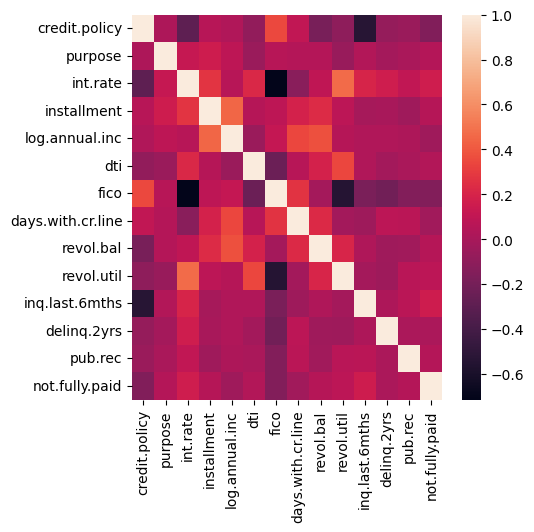

In [9]:
plt.figure(figsize=(5, 5))
sns.heatmap(pearson_corr)

In [10]:
# Correlation with output variable
corr_target = abs(pearson_corr["not.fully.paid"])
relevant_features = corr_target[corr_target > 0.1]
relevant_features

credit.policy     0.158119
int.rate          0.159552
fico              0.149666
inq.last.6mths    0.149452
not.fully.paid    1.000000
Name: not.fully.paid, dtype: float64

In [11]:
# Drop irrelevant features
def drop_irrelevant_features(df):
    df = df.drop(
        columns=[
            "credit.policy",
            # "purpose",
            # "int.rate",
            # "installment",
            # "log.annual.inc",
            # "dti",
            # "fico",
            # "days.with.cr.line",
            # "revol.bal",
            # "revol.util",
            # "inq.last.6mths",
            # "delinq.2yrs",
            # "pub.rec",
        ]
    )
    return df


df_loan_data = drop_irrelevant_features(df_loan_data)

In [12]:
df_loan_data.head()

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [13]:
def split_data(df):
    # Separate features and target variable
    X = df.drop("not.fully.paid", axis=1)
    y = df["not.fully.paid"]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    return X_train, X_test, y_train, y_test


def build_model(X_train):
    # define model
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Input(shape=(X_train.shape[1]), name="input_layer"),
            tf.keras.layers.Dense(
                64,
                activation="relu",
                kernel_regularizer=l2(0.01),
                name="hidden_layer_1",
            ),
            tf.keras.layers.Dense(
                64,
                activation="relu",
                kernel_regularizer=l2(0.01),
                name="hidden_layer_2",
            ),
            tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer"),
        ]
    )

    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
        metrics=["accuracy", Precision(), Recall(), AUC()],
    )
    return model


def train_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        verbose=0,
    )
    return history


def evaluate_model(model, X_test, y_test):
    scores = model.evaluate(X_test, y_test, verbose=0)
    return scores


def plot_history(history):
    epochs_range = range(len(history.history["loss"]))

    plt.plot(epochs_range, history.history["loss"], label="loss")
    plt.plot(epochs_range, history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.plot(epochs_range, history.history["accuracy"], label="accuracy")
    plt.plot(epochs_range, history.history["val_accuracy"], label="val_accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    plt.plot(epochs_range, history.history["precision"], label="precision")
    plt.plot(epochs_range, history.history["val_precision"], label="val_precision")
    plt.xlabel("Epoch")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

    plt.plot(epochs_range, history.history["recall"], label="recall")
    plt.plot(epochs_range, history.history["val_recall"], label="val_recall")
    plt.xlabel("Epoch")
    plt.ylabel("Recall")
    plt.legend()
    plt.show()

In [14]:
X_train, X_test, y_train, y_test = split_data(df_loan_data)

In [15]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = build_model(X_train)

In [17]:
history = train_model(model, X_train, y_train, X_test, y_test)

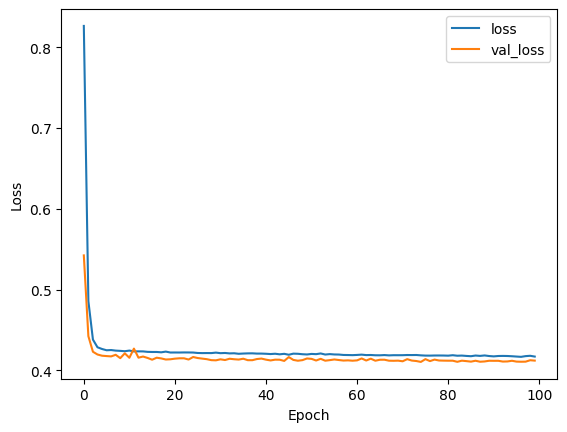

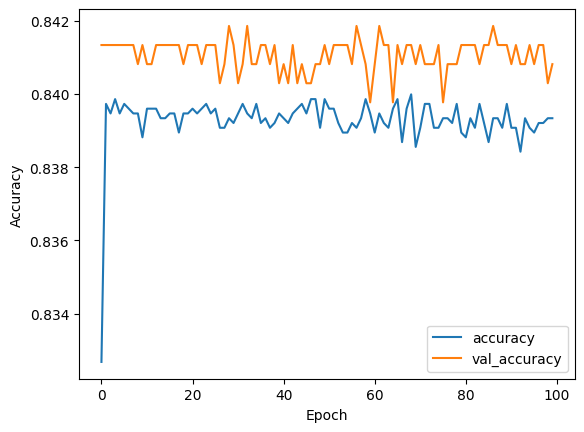

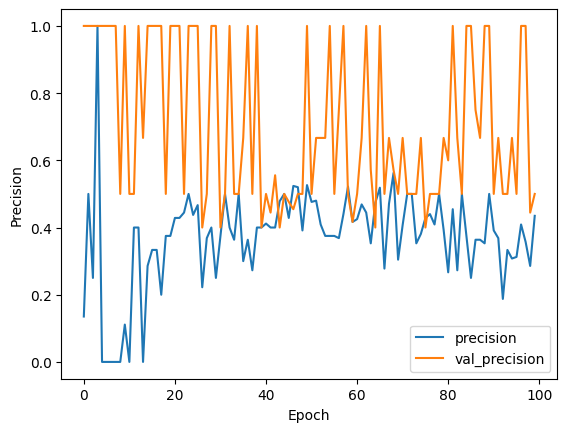

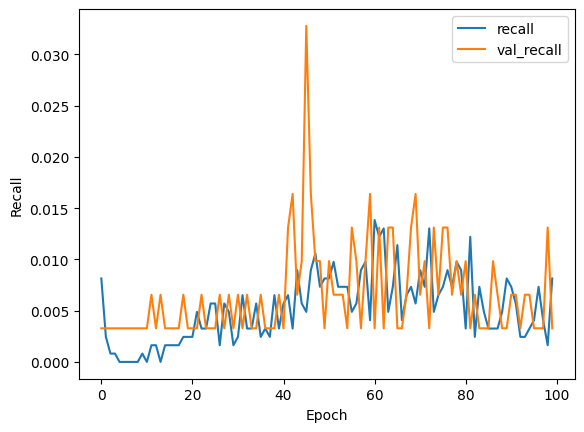

In [18]:
plot_history(history)

In [19]:
score = evaluate_model(model, X_test, y_test)

In [20]:
# Evaluate the model on test data
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Test precision:", score[2])
print("Test recall:", score[3])
print("Test auc:", score[4])

Test loss: 0.4122186601161957
Test accuracy: 0.8408141732215881
Test precision: 0.5
Test recall: 0.0032786885276436806
Test auc: 0.7016871571540833
